In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import operator
import pprint
from matplotlib import pyplot as plt
from IPython.display import Math
import pypropep as ppp

In [2]:
plt.style.use(u'ggplot')
plt.rcParams['figure.figsize'] = (10,6)
ppp.init()

Loaded 1921 thermo species
Loaded 1030 propellants


## Rocket Performance
*Finally* we are at the fun stuff.  The next section shows a basic rocket performance example.

In [3]:
p = ppp.ShiftingPerformance()
o2 = ppp.PROPELLANTS['OXYGEN (GAS)']
ch4 = ppp.PROPELLANTS['METHANE']
p.add_propellants([(ch4, 1.0), (o2, 1.0)])
p.set_state(P=10, Pe=0.01)
print p

Status:
	Equillibrium Computed: False
	Properties Computed: False
	Performance Computed: False
Composition:
	METHANE - 1.000 mol
	OXYGEN (GAS) - 1.000 mol
======= Chamber =======: 
	Pressure: 10.000 atm 
	Temperature: 2633.2 K 
	Enthalpy: -1776.988 kJ/kg 
	Int. Energy: -3151.060 kJ/kg 
	Gibbs Free Energy: -41203.642 kJ/kg 
	Entropy: 14.973 kJ/kg-K 
	Molar Mass: 15.934 g/mol 
	dV_P: -1.003
	dV_T: 1.055
	Cp: 3.333 kJ/kg-K
	Cv: 2.754 kJ/kg-K
	gamma: 1.207
	Sound Speed: 1288.0 m/s
	
	Ae/At: 0.00000
	A/dotm: 0.00000 m/s/atm
	C*: 0.00000 m/s
	Cf: 0.00000
	Ivac (m/s): 0.00000
	Isp (m/s): 0.00000
	Isp/g (s): 0.00000

======= Throat =======: 
	Pressure: 5.598 atm 
	Temperature: 2383.1 K 
	Enthalpy: -2535.079 kJ/kg 
	Int. Energy: -3775.079 kJ/kg 
	Gibbs Free Energy: -38216.726 kJ/kg 
	Entropy: 14.973 kJ/kg-K 
	Molar Mass: 15.979 g/mol 
	dV_P: -1.001
	dV_T: 1.026
	Cp: 2.987 kJ/kg-K
	Cv: 2.440 kJ/kg-K
	gamma: 1.223
	Sound Speed: 1231.3 m/s
	
	Ae/At: 1.00000
	A/dotm: 179.90079 m/s/atm
	C*: 1799.007

In [4]:
for k,v in p.composition.items():  
    print "{} : ".format(k)
    pprint.pprint(v[0:8], indent=4)

throat : 
[   ('H2', 0.37053126664817604),
    ('CO', 0.29309547119347473),
    ('H2O', 0.2925588718406252),
    ('CO2', 0.039520378100943),
    ('H', 0.0037556271545963796),
    ('OH', 0.0005319507065363911),
    ('O', 3.6123023497931884e-06),
    ('O2', 1.181410344189496e-06)]
chamber : 
[   ('H2', 0.3646428518836203),
    ('CO', 0.29535783590573855),
    ('H2O', 0.2937186277373591),
    ('CO2', 0.03630508960768873),
    ('H', 0.008336633264947477),
    ('OH', 0.001603559342244767),
    ('O', 2.354421918070456e-05),
    ('O2', 7.694135830008453e-06)]
exit : 
[   ('H2', 0.5268629576381628),
    ('CO2', 0.209344020868671),
    ('H2O', 0.13528531001025865),
    ('CO', 0.12173011295554459),
    ('CH4', 0.006777598527367429),
    ('CH3COOH', 0.0),
    ('C4H8,cyclo-', 0.0),
    ('CH3OH', 0.0)]


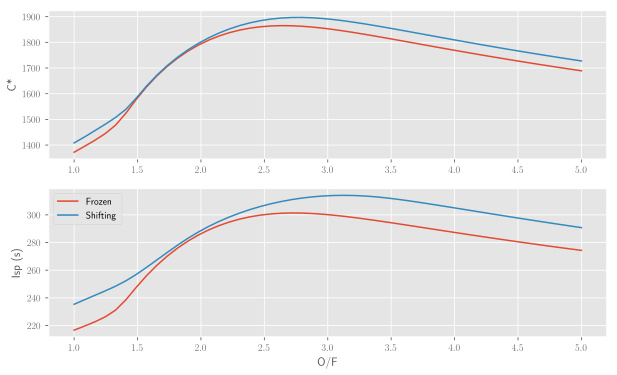

In [5]:
OF = np.linspace(1, 5)
m_CH4 = 1.0
cstar_fr = []
cstar_sh = []
Isp_fr = []
Isp_sh = []
for i in xrange(len(OF)):
    p = ppp.FrozenPerformance()
    psh = ppp.ShiftingPerformance()
    
    m_O2 = OF[i]
    
    p.add_propellants_by_mass([(ch4, m_CH4), (o2, m_O2)])
    psh.add_propellants_by_mass([(ch4, m_CH4), (o2, m_O2)])
    
    p.set_state(P=1000./14.7, Pe=1)
    psh.set_state(P=1000./14.7, Pe=1)
    
    cstar_fr.append(p.performance.cstar)
    Isp_fr.append(p.performance.Isp/9.8)
    
    cstar_sh.append(psh.performance.cstar)
    Isp_sh.append(psh.performance.Isp/9.8)

ax = plt.subplot(211)
ax.plot(OF, cstar_fr, label='Frozen')
ax.plot(OF, cstar_sh, label='Shifting')
ax.set_ylabel('C*')
ax1 = plt.subplot(212, sharex=ax)
ax1.plot(OF, Isp_fr, label='Frozen')
ax1.plot(OF, Isp_sh, label='Shifting')
ax1.set_ylabel('Isp (s)')
plt.xlabel('O/F')
plt.legend(loc='best')

### Equilibrium with condensed species

In [6]:
kno3 = ppp.PROPELLANTS['POTASSIUM NITRATE']
sugar = ppp.PROPELLANTS['SUCROSE (TABLE SUGAR)']
p = ppp.ShiftingPerformance()
p.add_propellants_by_mass([(kno3, 0.65), (sugar, 0.35)])
p.set_state(P=30, Pe=1.)

for station in ['chamber', 'throat', 'exit']:
    print "{} : ".format(station)
    pprint.pprint(p.composition[station][0:8], indent=4)
    print "Condensed: "
    pprint.pprint(p.composition_condensed[station], indent=4)
    print '\n'


chamber : 
[   ('H2O', 0.2918327383091397),
    ('CO', 0.19766628333479908),
    ('CO2', 0.14769097359464514),
    ('N2', 0.11908023017527887),
    ('H2', 0.11546779806866311),
    ('KOH', 0.017244121184755982),
    ('K', 0.0010316270856725938),
    ('K2O2H2', 0.0007354192843482245)]
Condensed: 
{   'K2CO3(L)': 0.10918913459264327}


throat : 
[   ('H2O', 0.28919185965786964),
    ('CO', 0.19238888137942037),
    ('CO2', 0.15117813255288348),
    ('H2', 0.12164986507525913),
    ('N2', 0.11937685085820164),
    ('KOH', 0.012814377225230197),
    ('K', 0.0007994663892011185),
    ('K2O2H2', 0.0004477938184247504)]
Condensed: 
{   'K2CO3(L)': 0.11211069812196284}


exit : 
[   ('H2O', 0.25917772372662917),
    ('CO2', 0.1834583110100156),
    ('H2', 0.16110507647029576),
    ('CO', 0.1555085326632558),
    ('N2', 0.12020666171394416),
    ('KOH', 0.0006208981946172623),
    ('K', 3.472457026754412e-05),
    ('NH3', 5.01875271076543e-06)]
Condensed: 
{   'K2CO3(L)': 0.11987644147981022}



### Smoky white space shuttle SRB exhaust

In [7]:
ap = ppp.PROPELLANTS['AMMONIUM PERCHLORATE (AP)']
pban = ppp.PROPELLANTS['POLYBUTADIENE/ACRYLONITRILE CO POLYMER']
al = ppp.PROPELLANTS['ALUMINUM (PURE CRYSTALINE)']
p = ppp.ShiftingPerformance()
p.add_propellants_by_mass([(ap, 0.70), (pban, 0.12), (al, 0.16)])
p.set_state(P=45, Ae_At=7.7)

for station in ['chamber', 'throat', 'exit']:
    print "{} : ".format(station)
    pprint.pprint(p.composition[station][0:8], indent=4)
    print "Condensed: "
    pprint.pprint(p.composition_condensed[station], indent=4)
    print '\n'
print p.performance.Ivac/9.8

chamber : 
[   ('H2', 0.1992602779457328),
    ('CO', 0.19831087917488865),
    ('H2O', 0.17256273796209426),
    ('HCL', 0.1371121461448577),
    ('N2', 0.09446820392444244),
    ('H', 0.04415645229655717),
    ('CO2', 0.020484156571504486),
    ('CL', 0.019933946084834266)]
Condensed: 
{   'AL2O3(L)': 0.07540083114604254}


throat : 
[   ('H2', 0.2031856597513713),
    ('CO', 0.1990700019772966),
    ('H2O', 0.1750080056604716),
    ('HCL', 0.14303579089047486),
    ('N2', 0.09534276736004431),
    ('H', 0.038795515881101535),
    ('CO2', 0.02112894887369862),
    ('CL', 0.018071456280908962)]
Condensed: 
{   'AL2O3(L)': 0.07849804617021526}


exit : 
[   ('H2', 0.22228747474578645),
    ('CO', 0.19919503245421558),
    ('H2O', 0.18427121775106942),
    ('HCL', 0.16945177237221543),
    ('N2', 0.09911951836743753),
    ('CO2', 0.028229087225899504),
    ('H', 0.006569601680685339),
    ('CL', 0.0035597018253303012)]
Condensed: 
{   'AL2O3(L)': 0.08610965738577263}


279.969890321


### And one final condensed species case
Remember the awesome video (https://www.youtube.com/watch?v=aJnrFKUz1Uc) of the RL-10 with liquid ice forming in the exhaust?  Let's see if we can show that this is possible thermodynamically.

Caveat - the ice formation in RL-10 is likely due to highly non-ideal effects like non-1D flow in the nozzle, non-equilibrium conditions etc.  But we can still show that it's possible even in idealized equilibrium conditions.


In [8]:
p = ppp.ShiftingPerformance()
lh2 = ppp.PROPELLANTS['HYDROGEN (CRYOGENIC)']
lox = ppp.PROPELLANTS['OXYGEN (LIQUID)']

OF = 3
p.add_propellants_by_mass([(lh2, 1.0), (lox, OF)])
p.set_state(P=200, Pe=0.01)

print "Chamber Temperature: %.3f K, Exit temperature: %.3f K" % (p.properties[0].T, p.properties[2].T)
print "Gaseous exit products:"
pprint.pprint(p.composition['exit'][0:8])

print "Condensed exit products:"
pprint.pprint(p.composition_condensed['exit'])

Chamber Temperature: 2455.604 K, Exit temperature: 266.987 K
Gaseous exit products:
[('H2', 0.6220083253121944),
 ('H2O', 0.34884033872640924),
 ('H2O2', 0.0),
 ('OH', 0.0),
 ('H', 0.0),
 ('O', 0.0),
 ('HO2', 0.0),
 ('O3', 0.0)]
Condensed exit products:
{'H2O(cr)': 0.029151335961390884}
